In [ ]:
'''
Exploratory Data Analysis (EDA)
    shape,head,info,describe

Handle Data Issues
    Missing values
        Drop column if too many missing
        Impute with median/mean for numerical feature
        Fill with mode for categorical features
    Handle Outliers
        detect outliers
            normally distributed data-> z score treatment
            skewed data-> IQR based fitting(boxplot)
        handle outliers
            trimming
            capping
    Handle Categorical Variables
        ordinal encoding | label encoding
        one-hot encoding

Feature Selection
    check correlation matrix->drop unnecessary features

Scaling

Train-test split

'''

'\nExploratory Data Analysis (EDA)\n    shape,head,info,describe\n\nHandle Data Issues\n    Missing values\n        Drop column if too many missing\n        Impute with median/mean for numerical feature\n        Fill with mode for categorical features\n    Handle Outliers\n        detect outliers\n            normally distributed data-> z score treatment\n            skewed data-> IQR based fitting(boxplot)\n        handle outliers\n            trimming\n            capping\n    Handle Categorical Variables\n        ordinal encoding | label encoding\n        one-hot encoding\n\nFeature Selection\n    check correlation matrix->drop unnecessary features\n\nScaling\n\nTrain-test split\n\n\n\n'

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [228]:
df = pd.read_csv('../data/insurance.csv')

In [229]:
df.shape

(1338, 7)

In [230]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [232]:
# there is no missing values in the dataset

In [233]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


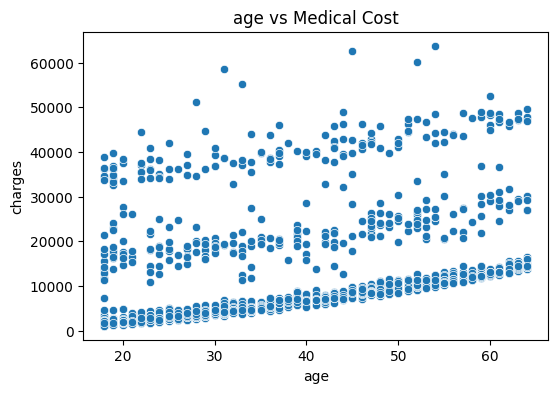

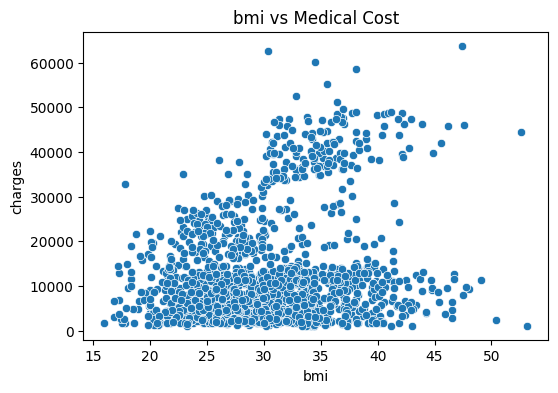

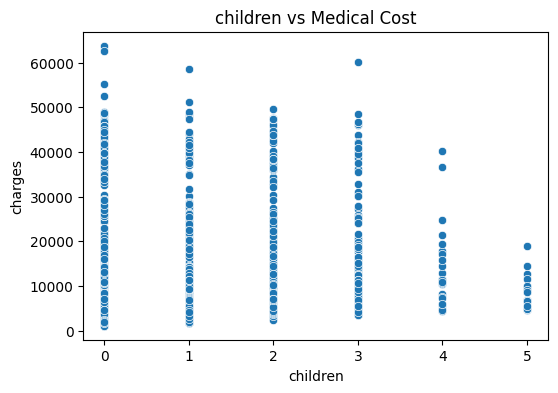

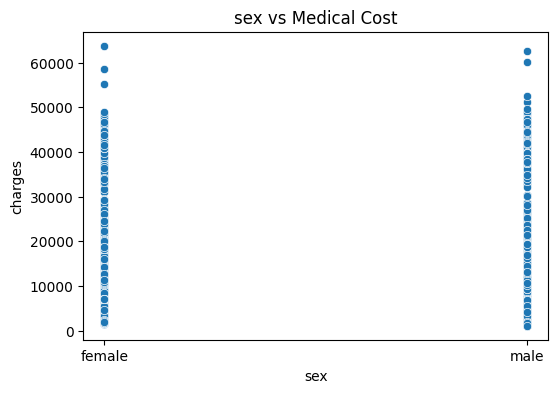

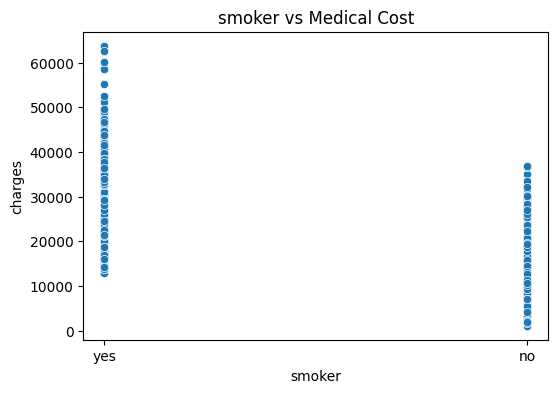

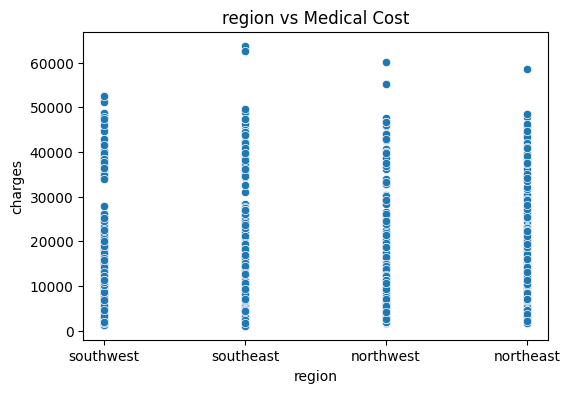

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['age', 'bmi', 'children','sex', 'smoker', 'region']

# to check how charges are distributed with respect to different features

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['charges'])
    plt.title(f"{feature} vs Medical Cost")
    plt.show()


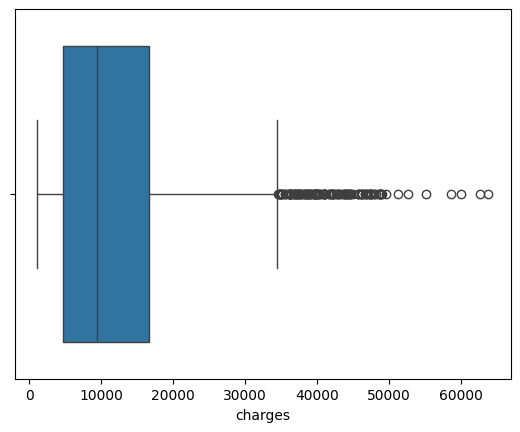

In [235]:
sns.boxplot(x=df["charges"])
plt.show()

In [236]:
# from the boxplot we can see that the data is right skewed
# using log transformation to make it normally distributed

In [237]:
df_new=df.copy()
df_new["charges_log"] = np.log1p(df["charges"])  # log(1 + x) to avoid log(0)

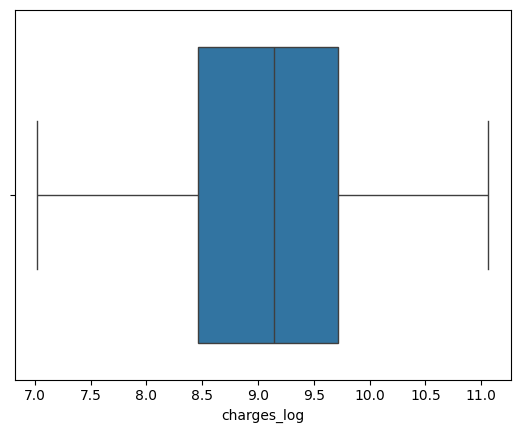

In [238]:
sns.boxplot(x=df_new["charges_log"])
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

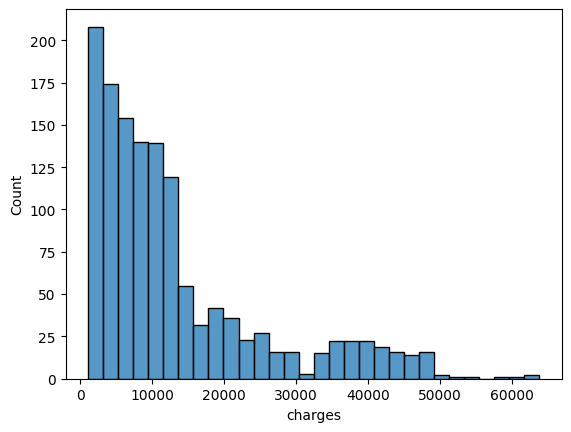

In [239]:
sns.histplot(df["charges"])

In [240]:
print(df["charges"].skew())

1.5158796580240388


In [241]:
print(df_new["charges_log"].skew())

-0.08981728740026824


<Axes: xlabel='charges_log', ylabel='Count'>

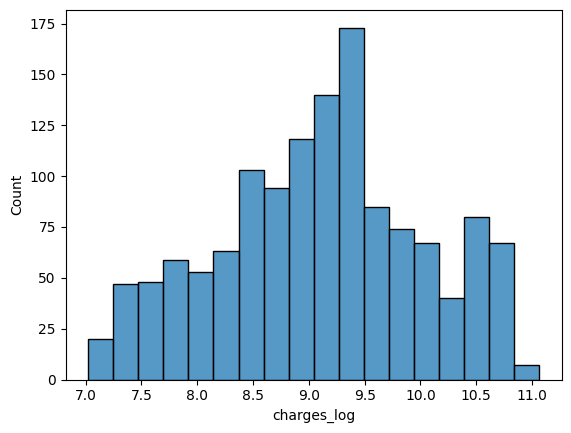

In [242]:
sns.histplot(df_new["charges_log"])

In [243]:
#charges_log is closer to normal distribution while previous charges feature is right skewed
# using charges_log feature instead of charges feature for training the model

In [244]:
df_new=df_new.drop("charges",axis=1)
df_new

,age,sex,bmi,children,smoker,region,charges_log
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755
1334,18,female,31.920,0,no,northeast,7.699381
1335,18,female,36.850,0,no,southeast,7.396847
1336,21,female,25.800,0,no,southwest,7.605365


In [245]:
# applying one hot encoding to categorical features

In [246]:
df_new = pd.get_dummies(df_new, columns=["sex", "smoker", "region"], drop_first=True)
df_new

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,False,True,False,False,True
1,18,33.770,1,7.453882,True,False,False,True,False
2,28,33.000,3,8.400763,True,False,False,True,False
3,33,22.705,0,9.998137,True,False,True,False,False
4,32,28.880,0,8.260455,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,True,False,True,False,False
1334,18,31.920,0,7.699381,False,False,False,False,False
1335,18,36.850,0,7.396847,False,False,False,True,False
1336,21,25.800,0,7.605365,False,False,False,False,True


In [247]:
df.shape

(1338, 7)

In [248]:
df_new.shape

(1338, 9)

In [249]:
#checking correlation matrix for feature selection

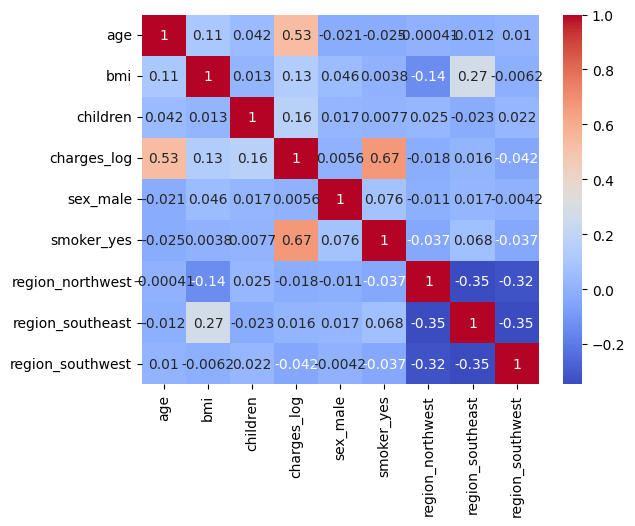

In [250]:
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [251]:


# taking original data for decision tree model training (after one hot encoding step & without log transformation cz decision tree can handle skewed data)
#it will be used later for decision tree model training

df_tree=df_new.copy()
df_tree=df_new.drop("charges_log",axis=1)
df_tree["charges"] = df["charges"]  # adding charges column back to the dataframe for decision tree model training
# now we have the final dataframe for decision tree model training
df_tree.to_csv("../data/tree_data.csv", index=False)

df_new

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,False,True,False,False,True
1,18,33.770,1,7.453882,True,False,False,True,False
2,28,33.000,3,8.400763,True,False,False,True,False
3,33,22.705,0,9.998137,True,False,True,False,False
4,32,28.880,0,8.260455,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,True,False,True,False,False
1334,18,31.920,0,7.699381,False,False,False,False,False
1335,18,36.850,0,7.396847,False,False,False,True,False
1336,21,25.800,0,7.605365,False,False,False,False,True


In [252]:
#keeping only age bmi smoker_yes and features as they are highly correlated with charges_log
# but choosing features only based on correlation matrix is not not always a good idea as it only checks linear relationships fails to capture non linear interactions
#anyways i will go with this for now and later when i will regularize the model i will include all the features and choose the best ones based on regularization

# Mean Squared Error: 0.24209095734106045
# R² Score: 0.7267125402128014

In [253]:
df_new = df_new[["age","bmi","smoker_yes","charges_log"]]
df_new

,age,bmi,smoker_yes,charges_log
0,19,27.900,True,9.734236
1,18,33.770,False,7.453882
2,28,33.000,False,8.400763
3,33,22.705,False,9.998137
4,32,28.880,False,8.260455
...,...,...,...,...
1333,50,30.970,False,9.268755
1334,18,31.920,False,7.699381
1335,18,36.850,False,7.396847
1336,21,25.800,False,7.605365


In [254]:
df_new.to_csv("../data/clean_data.csv", index=False)

In [255]:
x= df_new[["age","bmi","smoker_yes"]]
y= df_new[["charges_log"]]

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [258]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [259]:
scaler.fit(x_train)

StandardScaler()

In [260]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [261]:
# # Convert scaled arrays back to DataFrame with original column names
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# # View first few rows
# print(x_train_scaled_df.head())
# print(x_test_scaled_df.head())

In [262]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [263]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

#Mean Squared Error: 0.26382565944484465
#R² Score: 0.6871557429340037

Mean Squared Error: 0.22150744487172458
R² Score: 0.7360408721732032


c:\Users\debta\Videos\Development\ML Dev\Projects\Medical_Cost_Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


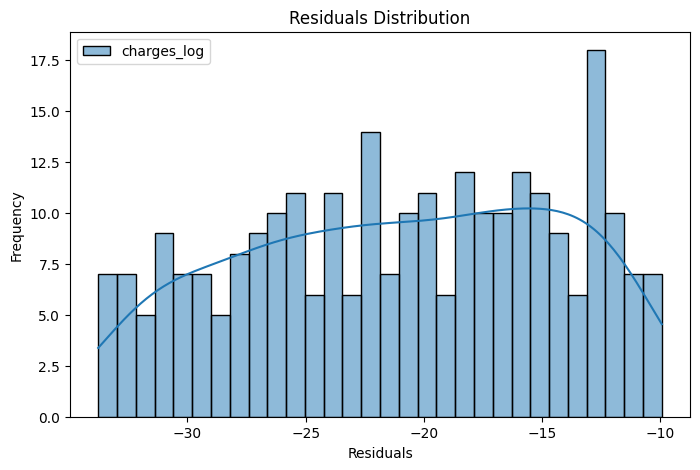

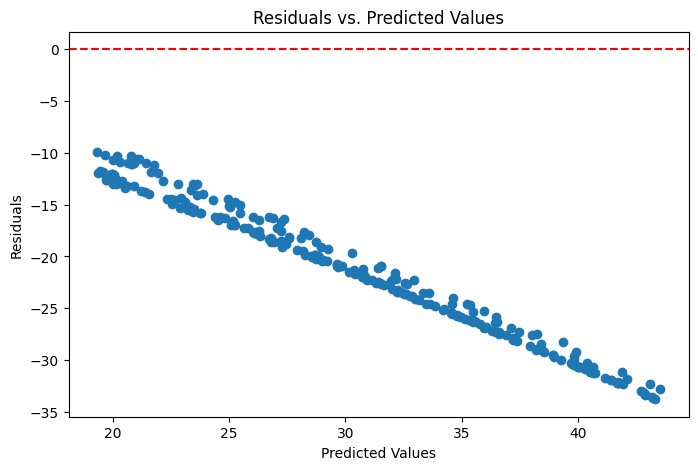

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = model.predict(x_test)

# Residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


Decision tree approach

In [265]:
df_tree

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,False,True,False,False,True,16884.92400
1,18,33.770,1,True,False,False,True,False,1725.55230
2,28,33.000,3,True,False,False,True,False,4449.46200
3,33,22.705,0,True,False,True,False,False,21984.47061
4,32,28.880,0,True,False,True,False,False,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False,10600.54830
1334,18,31.920,0,False,False,False,False,False,2205.98080
1335,18,36.850,0,False,False,False,True,False,1629.83350
1336,21,25.800,0,False,False,False,False,True,2007.94500


Successfully loaded tree_data.csv for Random Forest modeling.
Data shape: (1338, 9)
First 5 rows:
    age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest      charges  
0             False              True  16884.92400  
1              True             False   1725.55230  
2              True             False   4449.46200  
3             False             False  21984.47061  
4             False             False   3866.85520  

Columns: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']

Features (X) and target (y) defined.
X 

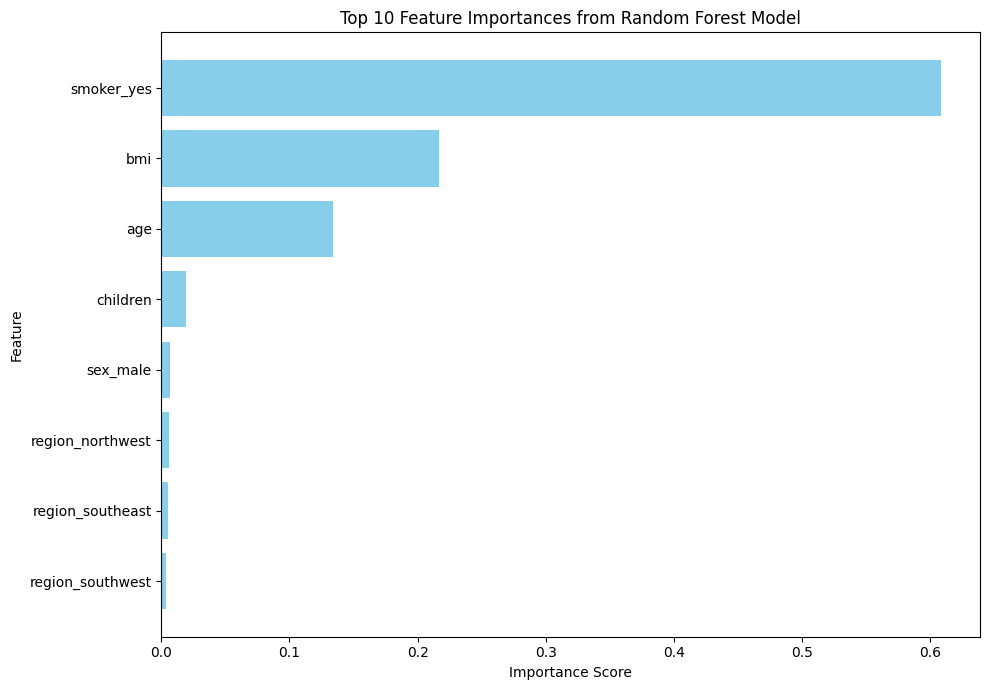


Random Forest modeling section complete.


In [266]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt # For plotting feature importances

# --- Data Loading and Preparation ---

# Load the preprocessed data specifically prepared for tree-based models.
# This data has undergone One-Hot Encoding for categorical features,
# and the target variable 'charges' is in its original scale (not log-transformed).
# The 'charges_log' column was removed prior to saving this file.
try:
    df_tree = pd.read_csv('../data/tree_data.csv') # Adjusted path
    print("Successfully loaded tree_data.csv for Random Forest modeling.")
    print("Data shape:", df_tree.shape)
    print("First 5 rows:\n", df_tree.head())
    print("\nColumns:", df_tree.columns.tolist())
except FileNotFoundError:
    print("Error: '../data/tree_data.csv' not found. Please check the file path.")
    # exit() # Or handle the error as appropriate for your workflow

# Define the feature matrix (X) and the target vector (y).
# 'charges' is our target variable. All other columns will be used as features.
if 'charges' in df_tree.columns:
    X = df_tree.drop('charges', axis=1)
    y = df_tree['charges']
    print("\nFeatures (X) and target (y) defined.")
    print("X shape:", X.shape)
    print("y shape:", y.shape)
else:
    print("Error: 'charges' column not found in the DataFrame. Cannot proceed.")
    # exit()

# Split the data into training and testing sets.
# Using a 80/20 split and a fixed random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)

# --- Random Forest Model Training and Evaluation ---

# Initialize the Random Forest Regressor.
# Starting with n_estimators=100, a common default that often works well.
# random_state is set for reproducibility of results across runs.
# n_jobs=-1 will use all available CPU cores to speed up training.
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
    # Other hyperparameters like max_depth, min_samples_leaf can be tuned later.
)

# Train the Random Forest model using the training data.
print("\nTraining the Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the unseen test data.
y_pred_rf = rf_model.predict(X_test)
print("\nPredictions made on the test set.")

# Evaluate the model's performance using common regression metrics.
# MAE gives the average absolute error in dollars.
# RMSE also measures error in dollars but penalizes larger errors more.
# R-squared indicates the proportion of variance in the target explained by the model.
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Random Forest Model - Test Set Performance ---")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:,.2f}")
print(f"R² Score: {r2_rf:.4f}")

# --- Feature Importance Analysis ---

# Random Forest models can provide insights into which features were most influential.
importances = rf_model.feature_importances_
feature_names = X_train.columns # Assuming X_train is a Pandas DataFrame

# Create a DataFrame for better readability of feature importances.
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 10 Feature Importances (Random Forest) ---")
print(feature_importance_df.head(10))

# Visualize the top 10 feature importances for a clearer understanding.
plt.figure(figsize=(10, 7)) # Adjusted size for better visualization
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances from Random Forest Model")
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

# Further steps could involve hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV)
# to potentially improve the model's performance, or trying other algorithms like XGBoost.
print("\nRandom Forest modeling section complete.")

In [267]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt # Uncomment if you plan to plot feature importances later

# --- Data Loading and Initial Setup ---
# Assuming the data loading and initial train-test split (X_train, X_test, y_train, y_test)
# has already been performed in previous cells using 'tree_data.csv'.
# X_train and y_train will be used for hyperparameter tuning.
# X_test and y_test will be used for final evaluation of the tuned model.

# For clarity, let's re-state what X_train, y_train should represent here:
# X_train: Features from 'tree_data.csv' (OHE applied, original numerical features) for training.
# y_train: Target 'charges' (original scale) for training.

# (If you need to re-run the data loading and split, you can uncomment and adapt this section)
# print("Reloading data and performing train-test split for clarity...")
# try:
#     df_tree = pd.read_csv('../data/tree_data.csv')
# except FileNotFoundError:
#     print("Error: '../data/tree_data.csv' not found. Please ensure the path is correct.")
#     exit()
# if 'charges' in df_tree.columns:
#     X = df_tree.drop('charges', axis=1)
#     y = df_tree['charges']
# else:
#     print("Error: 'charges' column not found in the DataFrame.")
#     exit()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Data reloaded and split. X_train shape:", X_train.shape)


print("\n--- Hyperparameter Tuning for Random Forest using RandomizedSearchCV ---")

# Define the parameter distribution for RandomizedSearchCV.
# This dictionary specifies the range of values I want to explore for each hyperparameter.
# I've chosen ranges based on common practices and what might make sense for this dataset.
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest.
    'max_depth': [5, 10, 15, 20, 25, None],      # Maximum depth of each tree. 'None' allows full growth.
    'min_samples_split': [2, 5, 10, 15],         # Minimum samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4, 6],            # Minimum samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2', 1.0]        # Number of features to consider at each split.
                                                 # Using '1.0' means all features (sklearn >= 1.1 default).
                                                 # 'sqrt' and 'log2' are common alternatives to introduce more randomness.
}

# Initialize the base Random Forest Regressor model.
# Setting random_state here ensures that the base model's internal randomness is consistent
# during the search, though RandomizedSearchCV itself has its own random_state for sampling.
# n_jobs=-1 will be used by the estimator when fitting within RandomizedSearchCV.
rf_base_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV.
# This will help find a good combination of hyperparameters more efficiently than GridSearchCV.
# n_iter: How many different combinations of parameters to try.
# cv: Number of folds for cross-validation. 5 is a standard choice.
# scoring: The metric to optimize. I'll use 'neg_mean_absolute_error' because I want to
#          minimize MAE, and RandomizedSearchCV aims to maximize the score.
# verbose: To get feedback during the fitting process.
# random_state for RandomizedSearchCV: Ensures the sampling of parameters is reproducible.
rf_random_search = RandomizedSearchCV(
    estimator=rf_base_for_tuning,
    param_distributions=param_dist,
    n_iter=50,  # I'll try 50 random combinations. This is a balance between search thoroughness and time.
                # If I had more time, I might increase this to 100 or more.
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    random_state=42, # For reproducibility of the search itself
    n_jobs=-1        # Use all available CPU cores for the search process
)

print("\nStarting RandomizedSearchCV fitting process. This might take a few minutes...")
# Fit RandomizedSearchCV on the training data (X_train, y_train).
# This will perform cross-validation for each of the n_iter parameter combinations.
rf_random_search.fit(X_train, y_train)
print("RandomizedSearchCV fitting complete.")

# Display the best hyperparameters found during the search.
print("\n--- Best Hyperparameters Found ---")
print(rf_random_search.best_params_)

# Get the best model (estimator) that was trained using these best hyperparameters
# on the full training set by RandomizedSearchCV.
best_rf_model_tuned = rf_random_search.best_estimator_

# Now, evaluate this tuned model on the held-out test set (X_test, y_test)
# to see how well it generalizes to unseen data.
print("\n--- Tuned Random Forest Model - Test Set Performance ---")
y_pred_tuned_rf = best_rf_model_tuned.predict(X_test)

# Calculate performance metrics for the tuned model.
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mean_squared_error(y_test, y_pred_tuned_rf))
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print(f"Mean Absolute Error (MAE): ${mae_tuned_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned_rf:,.2f}")
print(f"R² Score: {r2_tuned_rf:.4f}")

# It's important to compare these results with the performance of the Random Forest
# model that used default hyperparameters to see if tuning provided a significant improvement.
# For reference, my previous default RF results were approximately:
# MAE: $2,550.08, RMSE: $4,576.30, R² Score: 0.8651
# Let's see if this tuned version is better.

# Optionally, I can also examine the feature importances of this tuned model.
# importances_tuned_rf = best_rf_model_tuned.feature_importances_
# feature_names_tuned_rf = X_train.columns
# feature_importance_df_tuned_rf = pd.DataFrame({'feature': feature_names_tuned_rf, 'importance': importances_tuned_rf})
# feature_importance_df_tuned_rf = feature_importance_df_tuned_rf.sort_values(by='importance', ascending=False)
# print("\n--- Top 10 Feature Importances (Tuned Random Forest) ---")
# print(feature_importance_df_tuned_rf.head(10))
# plt.figure(figsize=(10, 7))
# plt.barh(feature_importance_df_tuned_rf['feature'][:10], feature_importance_df_tuned_rf['importance'][:10], color='lightcoral')
# plt.xlabel("Importance Score")
# plt.ylabel("Feature")
# plt.title("Top 10 Feature Importances from Tuned Random Forest Model")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

print("\nHyperparameter tuning section for Random Forest complete.")


--- Hyperparameter Tuning for Random Forest using RandomizedSearchCV ---

Starting RandomizedSearchCV fitting process. This might take a few minutes...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV fitting complete.

--- Best Hyperparameters Found ---
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 1.0, 'max_depth': 20}

--- Tuned Random Forest Model - Test Set Performance ---
Mean Absolute Error (MAE): $2,478.11
Root Mean Squared Error (RMSE): $4,369.96
R² Score: 0.8770

Hyperparameter tuning section for Random Forest complete.


In [268]:
# Save the trained model and scaler
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save both model and scaler
joblib.dump(model, '../models/medical_cost_model.joblib')
joblib.dump(scaler, '../models/scaler.joblib')

# Verify the files were saved correctly
print(f"Model file size: {os.path.getsize('../models/medical_cost_model.joblib')} bytes")
print(f"Scaler file size: {os.path.getsize('../models/scaler.joblib')} bytes")

Model file size: 607 bytes
Scaler file size: 1007 bytes


In [269]:
# Import necessary libraries
import joblib
import os
# Ensure your Random Forest model variable (e.g., rf_model) is defined and trained
# from the previous cells where you ran the initial Random Forest.

# --- Save the Untuned Random Forest Model ---

# Define the path for the models directory.
# This creates the directory if it doesn't already exist.
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)
print(f"Ensured models directory exists at: {os.path.abspath(models_dir)}") # Show absolute path for clarity

# Define the filename for your Random Forest model.
# It's good practice to include the model type in the filename.
rf_model_filename = 'random_forest_untuned_medical_cost_model.joblib'
rf_model_path = os.path.join(models_dir, rf_model_filename)

# Save the Random Forest model.
# For Random Forest trained on OHE features without scaling,
# you generally don't need to save a separate scaler for the features (X).
# The OHE was part of the data preparation that created 'tree_data.csv'.
# Your Streamlit app will need to perform the same OHE on user input.
try:
    joblib.dump(rf_model, rf_model_path) # Assuming your model is in the variable 'rf_model'
    print(f"\nUntuned Random Forest model saved successfully to: {rf_model_path}")

    # Verify the file was saved and get its size.
    if os.path.exists(rf_model_path):
        print(f"Model file size: {os.path.getsize(rf_model_path)} bytes")
    else:
        print(f"Error: Model file not found at {rf_model_path} after attempting to save.")

except NameError:
    print("Error: The variable 'rf_model' is not defined. Please ensure your Random Forest model is trained and stored in this variable before saving.")
except Exception as e:
    print(f"An unexpected error occurred while saving the model: {e}")

# --- What your Streamlit app will need ---
# When you load this model in your Streamlit app:
# 1. You'll load 'random_forest_untuned_medical_cost_model.joblib'.
# 2. Your Streamlit app will need to take raw user input (age, sex, bmi, children, smoker, region).
# 3. It will then need to perform the *exact same One-Hot Encoding* on the categorical inputs
#    (sex, smoker, region) to create the 8 feature columns that this rf_model was trained on.
#    This means you might also need to save your OneHotEncoder object if you haven't already,
#    or ensure your Streamlit app can replicate the OHE precisely (same categories, same dummy variable dropping).
# 4. Then, you can pass the processed user input to rf_model.predict().

Ensured models directory exists at: c:\Users\debta\Videos\Development\ML Dev\Projects\Medical_Cost_Prediction\models

Untuned Random Forest model saved successfully to: ../models\random_forest_untuned_medical_cost_model.joblib
Model file size: 9730609 bytes
